In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
import GoH.reports
import GoH.utilities
import GoH.clean
import GoH.normalize
import re
import os
from os import listdir
from os.path import isfile, join
import collections

In [4]:
%matplotlib inline

In [5]:
wordlist_dir = "/Users/jeriwieringa/Dissertation/drafts/data/word-lists"
wordlists = ["2016-12-07-SDA-last-names.txt", 
             "2016-12-07-SDA-place-names.txt", 
             "2016-12-08-SDA-Vocabulary.txt", 
             "2017-01-03-place-names.txt", 
             "2017-02-14-Base-Word-List-SCOWL&KJV.txt",
             "2017-02-14-Roman-Numerals.txt",
             "2017-03-01-Additional-Approved-Words.txt"
            ]

In [6]:
spelling_dictionary = GoH.utilities.create_spelling_dictionary(wordlists, wordlist_dir)

In [7]:
title = "RH"

In [8]:
base_dir = "/Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/RH1850-1889/"

## Baseline

In [9]:
cycle = 'baseline'

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/RH1850-1889/baseline

Average verified rate: 0.9314553511180835

Average of error rates: 0.06751202870716669

Total token count: 47435096



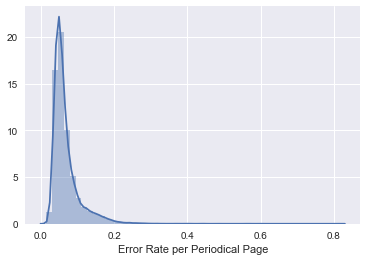

In [10]:
stats = GoH.reports.overview_report(join(base_dir, cycle), spelling_dictionary, title)

In [11]:
errors_summary = GoH.reports.get_errors_summary( stats )
GoH.reports.top_errors( errors_summary, 1000 )

[('-', 131160),
 ('m', 64000),
 ('e', 56218),
 ("'", 52175),
 ('t', 47235),
 ('w', 46657),
 ('d', 45544),
 ('n', 38243),
 ('r', 31474),
 ('re-', 27214),
 ('ñ', 26899),
 (')', 26262),
 ('¥', 24931),
 ('f', 24709),
 ('g', 23119),
 ('tion', 20908),
 ('th', 20839),
 ('con-', 20301),
 ('co', 19596),
 ('in-', 18506),
 ('be-', 16538),
 ('de-', 12712),
 ('com-', 12321),
 ('pp', 11379),
 ('ex-', 11137),
 ('ñthe', 11086),
 ('ment', 9635),
 (']', 9616),
 ('wm', 9173),
 ('(', 9118),
 ('un-', 7588),
 ('sab-', 7143),
 ('dis-', 6848),
 ('en-', 6746),
 ('u', 6507),
 ('first-day', 6477),
 ('[vol', 6116),
 ('tions', 6004),
 ('per-', 5979),
 ('sr', 5604),
 ('im-', 5541),
 ('pre-', 5419),
 ('*', 5372),
 ('x', 5236),
 ('ac-', 5220),
 ('an-', 5211),
 ('meet-', 5172),
 ('ap-', 5069),
 ('ly', 5058),
 ('ad-', 5002),
 ('pro-', 4934),
 ('_', 4782),
 ('ence', 4631),
 ('ments', 4597),
 ('--', 4574),
 ('ex', 4505),
 ('oz', 4479),
 ('ers', 3973),
 ('ble', 3946),
 ('al-', 3916),
 ('k', 3914),
 ('ña', 3865),
 ('at-', 

## Review Special Character Use

In [12]:
GoH.reports.tokens_with_special_characters(errors_summary)

[('ñ', 26899),
 (')', 26262),
 ('¥', 24931),
 ('ñthe', 11086),
 (']', 9616),
 ('(', 9118),
 ('[vol', 6116),
 ('*', 5372),
 ('_', 4782),
 ('ña', 3865),
 ('á', 3630),
 ('ã', 2521),
 ('/', 2338),
 ('ñwe', 1951),
 ('ñi', 1636),
 ('(the', 1523),
 ('ñit', 1442),
 ('(for', 1342),
 ('ñdied', 1319),
 ('ñin', 1115),
 ('[', 1093),
 ('(see', 1035),
 ('thereforeñ', 1009),
 ('[the', 1006),
 ('\\', 985),
 ('ñno', 946),
 ('¡', 937),
 ('`', 879),
 ('(to', 826),
 ('(or', 791),
 ('=', 771),
 ('ô', 767),
 ('(as', 746),
 ('¥¥', 732),
 ('ñsel', 701),
 ('(and', 684),
 ('ñsince', 683),
 ('ñthere', 680),
 ('ñthat', 662),
 ('(which', 635),
 ('ñan', 621),
 ('ñand', 619),
 ('ñat', 585),
 ('(s', 571),
 ('(rev', 570),
 ('(concluded', 554),
 ('£', 551),
 ('}', 546),
 ('(i', 538),
 ('(a', 532),
 ('%', 528),
 ('andñ', 527),
 ('<', 525),
 ('l\\', 518),
 ('(in', 518),
 ('(continued', 500),
 ('ó', 492),
 ('ñto', 482),
 ('ñour', 478),
 ('\\ve', 472),
 ("¥'", 467),
 ('ñtwo', 457),
 ('ñone', 455),
 ('i)', 452),
 ('ñprice', 

## Correction 1 -- Normalize Characters

In [13]:
# %load shared_elements/normalize_characters.py
prev = "baseline"
cycle = "correction1"

directories = GoH.utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = GoH.utilities.readfile(directories['prev'], filename)

    # Substitute for all other dashes
    content = re.sub(r"—-—–‑", r"-", content)

    # Substitute formatted apostrophe
    content = re.sub(r"\’\’\‘\'\‛\´", r"'", content)
    
    # Replace all special characters with a space (as these tend to occur at the end of lines)
    content = re.sub(r"[^a-zA-Z0-9\s,.!?$:;\-&\'\"]", r" ", content)
    
    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

## Check Correction 1

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/RH1850-1889/correction1

Average verified rate: 0.9386151951628019

Average of error rates: 0.06023006165975942

Total token count: 47366429



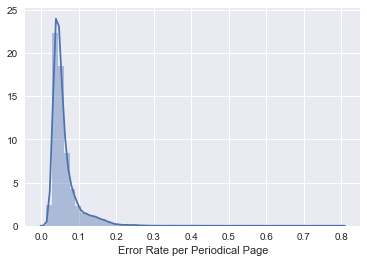

In [14]:
# %load shared_elements/summary.py
summary = GoH.reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [15]:
# %load shared_elements/top_errors.py
errors_summary = GoH.reports.get_errors_summary( summary )
GoH.reports.top_errors( errors_summary, 10 )[:50]

[('-', 134783),
 ('m', 64696),
 ('e', 57771),
 ("'", 55914),
 ('t', 49108),
 ('w', 47216),
 ('d', 46498),
 ('n', 39366),
 ('r', 32499),
 ('re-', 27261),
 ('f', 25585),
 ('g', 23542),
 ('th', 21256),
 ('tion', 21028),
 ('con-', 20335),
 ('co', 19774),
 ('in-', 18561),
 ('be-', 16582),
 ('de-', 12760),
 ('com-', 12365),
 ('pp', 11459),
 ('ex-', 11160),
 ('ment', 9687),
 ('wm', 9272),
 ('un-', 7605),
 ('sab-', 7165),
 ('dis-', 6867),
 ('u', 6768),
 ('en-', 6758),
 ('first-day', 6511),
 ('tions', 6022),
 ('per-', 5995),
 ('sr', 5667),
 ('im-', 5549),
 ('pre-', 5436),
 ('x', 5363),
 ('an-', 5226),
 ('ac-', 5225),
 ('meet-', 5179),
 ('--', 5169),
 ('ly', 5144),
 ('ap-', 5082),
 ('ex', 5053),
 ('ad-', 5014),
 ('pro-', 4951),
 ('ence', 4668),
 ('ments', 4621),
 ('oz', 4485),
 ('k', 4103),
 ('ers', 4008)]

## Correction 2 -- Correct Line Endings

In [16]:
# %load shared_elements/correct_line_endings.py
prev = cycle
cycle = "correction2"

directories = GoH.utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = GoH.utilities.readfile(directories['prev'], filename)

    content = re.sub(r"(\w+)(\-\s{1,})([a-z]+)", r"\1\3", content)

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

## Check Correction 2

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/RH1850-1889/correction2

Average verified rate: 0.9574540747318334

Average of error rates: 0.04138961892247043

Total token count: 46630811



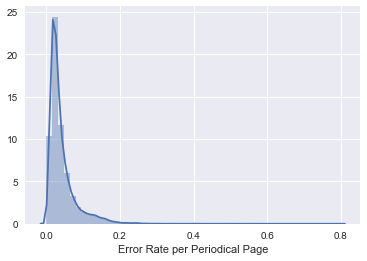

In [17]:
# %load shared_elements/summary.py
summary = GoH.reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [18]:
# %load shared_elements/top_errors.py
errors_summary = GoH.reports.get_errors_summary( summary )
GoH.reports.top_errors( errors_summary, 10 )[:50]

[('-', 133940),
 ('m', 64580),
 ('e', 57391),
 ("'", 55914),
 ('t', 48746),
 ('w', 47165),
 ('d', 46259),
 ('n', 39198),
 ('r', 32344),
 ('f', 25489),
 ('g', 23354),
 ('th', 21211),
 ('co', 19709),
 ('pp', 11447),
 ('wm', 9272),
 ('u', 6725),
 ('first-day', 6498),
 ('sr', 5664),
 ('x', 5349),
 ('--', 5169),
 ('ex', 5051),
 ('oz', 4485),
 ('k', 4073),
 ('tion', 4008),
 ('brn', 3745),
 ('pm', 3591),
 ('-the', 3427),
 ('re', 3181),
 ('vt', 2859),
 ("of'", 2772),
 ("'the", 2747),
 ('pa', 2729),
 ('al', 2698),
 ('q', 2685),
 ("''", 2407),
 ('nd', 2241),
 ('ets', 2227),
 ('re-', 2169),
 ('mo', 2146),
 ('ti', 1984),
 ('il', 1970),
 ("the'", 1911),
 ('mt', 1846),
 ('ment', 1846),
 ('third-day', 1813),
 ('z', 1804),
 ('---', 1775),
 ('two-horned', 1685),
 ('es', 1600),
 ('ft', 1577)]

## Correction 3 -- Remove Extra Dashes

In [19]:
# %load shared_elements/remove_extra_dashes.py
prev = cycle
cycle = "correction3"

directories = GoH.utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = GoH.utilities.readfile(directories['prev'], filename)
    
    text = re.sub(r"[0-9,!?$:;&]", " ", content)
    tokens = GoH.utilities.tokenize_text(text)
    
    replacements = []
    for token in tokens:
        if token[0] is "-":
            replacements.append((token, token[1:]))
            
        elif token[-1] is "-":
            replacements.append((token, token[:-1]))
        else:
            pass
        
    if len(replacements) > 0:
#         print("{}: {}".format(filename, replacements))
        
        for replacement in replacements:
            content = GoH.clean.replace_pair(replacement, content)
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

## Check Correction 3

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/RH1850-1889/correction3

Average verified rate: 0.9641118299486852

Average of error rates: 0.03492484585060144

Total token count: 46679839



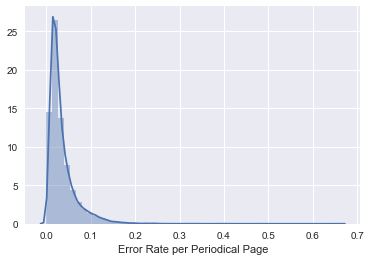

In [20]:
# %load shared_elements/summary.py
summary = GoH.reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [21]:
# %load shared_elements/top_errors.py
errors_summary = GoH.reports.get_errors_summary( summary )
GoH.reports.top_errors( errors_summary, 10 )[:50]

[('m', 64924),
 ('e', 58451),
 ("'", 57791),
 ('t', 49838),
 ('w', 47576),
 ('d', 46731),
 ('n', 39736),
 ('r', 33057),
 ('f', 25859),
 ('g', 23871),
 ('th', 21447),
 ('co', 21119),
 ('pp', 11488),
 ('wm', 9339),
 ('re', 7700),
 ('u', 6854),
 ('ex', 6012),
 ('sr', 5681),
 ('x', 5408),
 ('oz', 4493),
 ('k', 4170),
 ('tion', 4030),
 ('brn', 3750),
 ('pm', 3610),
 ('al', 2980),
 ('pa', 2883),
 ('vt', 2872),
 ("of'", 2780),
 ("'the", 2767),
 ('q', 2740),
 ("''", 2525),
 ('nd', 2299),
 ('mo', 2267),
 ('ets', 2231),
 ('ti', 2228),
 ('il', 2051),
 ("the'", 1934),
 ('z', 1865),
 ('ment', 1865),
 ('mt', 1863),
 ('es', 1805),
 ('se', 1764),
 ('ft', 1654),
 ('pre', 1582),
 ("'s", 1582),
 ('ni', 1553),
 ('aro', 1508),
 ('ch', 1503),
 ('wo', 1480),
 ('id', 1450)]

## Correction 4 -- Remove Extra Quotation Marks

In [22]:
# %load shared_elements/replace_extra_quotation_marks.py
prev = cycle
cycle = "correction4"

directories = GoH.utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = GoH.utilities.readfile(directories['prev'], filename)
    
    text = re.sub(r"[0-9,!?$:;&]", " ", content)
    tokens = GoH.utilities.tokenize_text(text)
    
    corrections = []
    for token in tokens:
        token_list = list(token)
        last_char = token_list[-1]

        if last_char is "'":
            if len(token) > 1:
                if token_list[-2] is 's' or 'S':
                    pass
                else:
                    corrections.append((token, re.sub(r"'", r"", token)))
            else:
                pass
        elif token[0] is "'":
            corrections.append((token, re.sub(r"'", r"", token)))   
        else:
            pass
    
    if len(corrections) > 0:
#         print('{}: {}'.format(filename, corrections))

        for correction in corrections:
            content = GoH.clean.replace_pair(correction, content)
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

## Review Correction 4

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/RH1850-1889/correction4

Average verified rate: 0.9652890093627449

Average of error rates: 0.03376372182351158

Total token count: 46680114



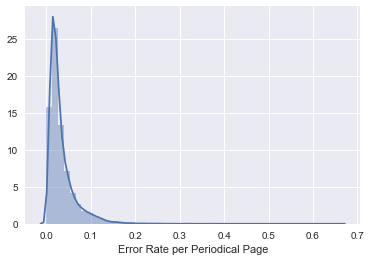

In [23]:
# %load shared_elements/summary.py
summary = GoH.reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [24]:
# %load shared_elements/top_errors.py
errors_summary = GoH.reports.get_errors_summary( summary )
GoH.reports.top_errors( errors_summary, 10 )[:50]

[('m', 65130),
 ('e', 59137),
 ('t', 51701),
 ("'", 49904),
 ('w', 47728),
 ('d', 47023),
 ('n', 40436),
 ('r', 33456),
 ('f', 26147),
 ('g', 23942),
 ('th', 21522),
 ('co', 21148),
 ('pp', 11499),
 ('wm', 9369),
 ('re', 7853),
 ('u', 6895),
 ('ex', 6026),
 ('sr', 5688),
 ('x', 5439),
 ('oz', 4495),
 ('k', 4207),
 ('tion', 4042),
 ('brn', 3750),
 ('pm', 3616),
 ('al', 3015),
 ('pa', 2897),
 ('vt', 2878),
 ('q', 2755),
 ("of'", 2628),
 ('nd', 2452),
 ('mo', 2271),
 ('ti', 2263),
 ('ets', 2238),
 ("''", 2106),
 ('il', 2081),
 ('z', 1881),
 ('mt', 1874),
 ('ment', 1869),
 ('es', 1847),
 ('se', 1802),
 ("the'", 1784),
 ('ft', 1669),
 ('pre', 1586),
 ('ni', 1564),
 ('ch', 1517),
 ('aro', 1511),
 ('wo', 1495),
 ('ve', 1483),
 ('id', 1478),
 ('ly', 1449)]

## Correction 5 -- Rejoin Burst Words

In [25]:
# %load shared_elements/rejoin_burst_words.py
prev = cycle
cycle = "correction5"

directories = GoH.utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = GoH.utilities.readfile(directories['prev'], filename)

    pattern = re.compile("(\s(\w{1,2}\s){5,})")
    
    replacements = []
    GoH.clean.check_splits(pattern, spelling_dictionary, content, replacements)
    
    if len(replacements) > 0:
#         print('{}: {}'.format(filename, replacements))

        for replacement in replacements:
            content = GoH.clean.replace_pair(replacement, content)
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

## Review Correction 5

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/RH1850-1889/correction5

Average verified rate: 0.9652912228839922

Average of error rates: 0.0337613464065501

Total token count: 46680037



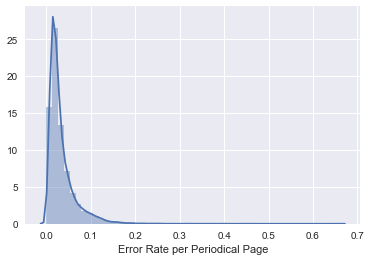

In [26]:
# %load shared_elements/summary.py
summary = GoH.reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [27]:
# %load shared_elements/top_errors.py
errors_summary = GoH.reports.get_errors_summary( summary )
GoH.reports.top_errors( errors_summary, 10 )[:50]

[('m', 65096),
 ('e', 58978),
 ('t', 51588),
 ("'", 49904),
 ('w', 47706),
 ('d', 47165),
 ('n', 40381),
 ('r', 33354),
 ('f', 26132),
 ('g', 23923),
 ('th', 21522),
 ('co', 21148),
 ('pp', 11499),
 ('wm', 9369),
 ('re', 7865),
 ('u', 6860),
 ('ex', 6026),
 ('sr', 5688),
 ('x', 5437),
 ('oz', 4495),
 ('k', 4192),
 ('tion', 4042),
 ('brn', 3750),
 ('pm', 3616),
 ('al', 3016),
 ('pa', 2897),
 ('vt', 2878),
 ('q', 2753),
 ("of'", 2628),
 ('nd', 2452),
 ('mo', 2271),
 ('ti', 2263),
 ('ets', 2238),
 ("''", 2106),
 ('il', 2081),
 ('z', 1881),
 ('mt', 1874),
 ('ment', 1869),
 ('es', 1858),
 ('se', 1802),
 ("the'", 1784),
 ('ft', 1669),
 ('pre', 1586),
 ('ni', 1564),
 ('ch', 1518),
 ('aro', 1511),
 ('wo', 1495),
 ('ve', 1483),
 ('id', 1478),
 ('ly', 1451)]

## Correction 6 -- Join Split Words

In [28]:
# %load shared_elements/rejoin_split_words.py
prev = cycle
cycle = "correction6"

directories = GoH.utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = GoH.utilities.readfile(directories['prev'], filename)
    
    text = re.sub(r"[0-9,!?$:;&]", " ", content)
    tokens = GoH.utilities.tokenize_text(text)
    errors = GoH.reports.identify_errors(tokens, spelling_dictionary)

    replacements = GoH.clean.check_if_stem(errors, spelling_dictionary, tokens, get_prior=False)
    
    if len(replacements) > 0:
#         print('{}: {}'.format(filename, replacements))

        for replacement in replacements:
            content = GoH.clean.replace_split_words(replacement, content)
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

## Check Correction 6

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/RH1850-1889/correction6

Average verified rate: 0.9656679792231431

Average of error rates: 0.0333978065298696

Total token count: 46662881



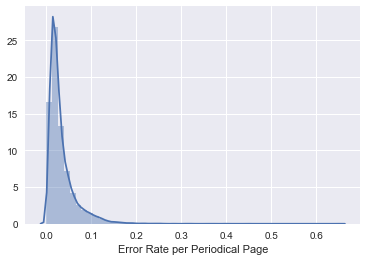

In [29]:
# %load shared_elements/summary.py
summary = GoH.reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [32]:
# %load shared_elements/top_errors.py
errors_summary = GoH.reports.get_errors_summary( summary )
GoH.reports.top_errors( errors_summary, 10 )[:50]

[('m', 65326),
 ('e', 58371),
 ('t', 51021),
 ("'", 49904),
 ('w', 47641),
 ('d', 46981),
 ('n', 40227),
 ('r', 33209),
 ('f', 26117),
 ('g', 23833),
 ('th', 20787),
 ('co', 19764),
 ('pp', 11493),
 ('wm', 9355),
 ('u', 6843),
 ('ex', 5849),
 ('sr', 5684),
 ('x', 5430),
 ('re', 4938),
 ('oz', 4478),
 ('k', 4162),
 ('tion', 3894),
 ('brn', 3750),
 ('pm', 3616),
 ('vt', 2878),
 ('pa', 2782),
 ('q', 2750),
 ('al', 2660),
 ("of'", 2628),
 ('nd', 2440),
 ('ets', 2235),
 ("''", 2106),
 ('mo', 2106),
 ('ti', 2030),
 ('il', 1995),
 ('z', 1878),
 ('mt', 1856),
 ('ment', 1800),
 ("the'", 1784),
 ('es', 1736),
 ('se', 1676),
 ('ft', 1664),
 ('aro', 1507),
 ('ni', 1500),
 ('wo', 1462),
 ('ve', 1441),
 ('ly', 1429),
 ('id', 1424),
 ('eze', 1357),
 ('tt', 1346)]

## Correction 7 -- Rejoin Split Words II

In [33]:
# %load shared_elements/rejoin_split_words.py
prev = cycle
cycle = "correction7"

directories = GoH.utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = GoH.utilities.readfile(directories['prev'], filename)
    
    text = re.sub(r"[0-9,!?$:;&]", " ", content)
    tokens = GoH.utilities.tokenize_text(text)
    errors = GoH.reports.identify_errors(tokens, spelling_dictionary)

    replacements = GoH.clean.check_if_stem(errors, spelling_dictionary, tokens, get_prior=True)
    
    if len(replacements) > 0:
#         print('{}: {}'.format(filename, replacements))

        for replacement in replacements:
            content = GoH.clean.replace_split_words(replacement, content)
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/RH1850-1889/correction7

Average verified rate: 0.965801159403873

Average of error rates: 0.03326771454563833

Total token count: 46646903



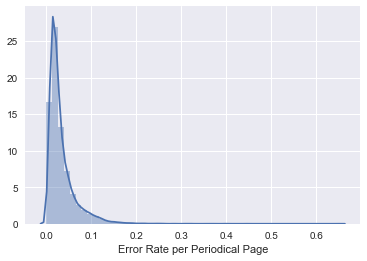

In [34]:
# %load shared_elements/summary.py
summary = GoH.reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [35]:
# %load shared_elements/top_errors.py
errors_summary = GoH.reports.get_errors_summary( summary )
GoH.reports.top_errors( errors_summary, 10 )[:50]

[('m', 65148),
 ('e', 58217),
 ('t', 50806),
 ("'", 49846),
 ('w', 47325),
 ('d', 46858),
 ('n', 40150),
 ('r', 33102),
 ('f', 26034),
 ('g', 23714),
 ('th', 20526),
 ('co', 19615),
 ('pp', 11482),
 ('wm', 9341),
 ('u', 6811),
 ('ex', 5839),
 ('sr', 5684),
 ('x', 5430),
 ('oz', 4478),
 ('k', 4140),
 ('tion', 3869),
 ('re', 3793),
 ('brn', 3750),
 ('pm', 3611),
 ('vt', 2867),
 ('pa', 2779),
 ('q', 2739),
 ("of'", 2628),
 ('al', 2455),
 ('ets', 2231),
 ('nd', 2148),
 ("''", 2106),
 ('mo', 2089),
 ('ti', 1994),
 ('il', 1949),
 ('z', 1872),
 ('mt', 1853),
 ("the'", 1782),
 ('ment', 1700),
 ('ft', 1618),
 ('se', 1541),
 ('aro', 1506),
 ('ni', 1490),
 ('es', 1468),
 ('wo', 1431),
 ('ve', 1357),
 ('eze', 1357),
 ('id', 1345),
 ('tt', 1335),
 ('ch', 1298)]

## Review Remaining Errors

In [36]:
GoH.reports.docs_with_high_error_rate(summary)

[('RH18851222-V62-50-page1.txt', 0.651),
 ('RH18740113-V43-05-page8.txt', 0.447),
 ('RH18750115-V45-03-page1.txt', 0.4),
 ('RH18750701-V46-01-page1.txt', 0.4),
 ('RH18731209-V42-26-page8.txt', 0.372),
 ('RH18740127-V43-07-page8.txt', 0.359),
 ('RH18721217-V41-01-page8.txt', 0.321),
 ('RH18740210-V43-09-page8.txt', 0.32),
 ('RH18880424-V65-17-page14.txt', 0.31),
 ('RH18730422-V41-19-page8.txt', 0.31),
 ('RH18721231-V41-03-page8.txt', 0.285),
 ('RH18700823-V36-10-page8.txt', 0.283),
 ('RH18761026-V48-17-page11.txt', 0.263),
 ('RH18740303-V43-12-page8.txt', 0.261),
 ('RH18730916-V42-14-page6.txt', 0.259),
 ('RH18661009-V28-19-page7.txt', 0.254),
 ('RH18781128-V52-22-page12.txt', 0.254),
 ('RH18760427-V47-17-page10.txt', 0.251),
 ('RH18731230-V43-03-page8.txt', 0.25),
 ('RH18771231-V50-25s-page1.txt', 0.25),
 ('RH18840122-V61-04-page7.txt', 0.245),
 ('RH18781128-V52-22-page9.txt', 0.244),
 ('RH18740908-V44-12-page8.txt', 0.244),
 ('RH18760427-V47-17-page11.txt', 0.243),
 ('RH18731021-V42-1

In [37]:
# %load shared_elements/high_error_rates.py
doc_keys = [x[0] for x in GoH.reports.docs_with_high_error_rate(summary) if x[1] > 0.3]

GoH.utilities.open_original_docs(doc_keys, directories['cycle'])

Opened files: 

RH18851222-V62-50-page1.txt

RH18740113-V43-05-page8.txt

RH18750115-V45-03-page1.txt

RH18750701-V46-01-page1.txt

RH18731209-V42-26-page8.txt

RH18740127-V43-07-page8.txt

RH18721217-V41-01-page8.txt

RH18740210-V43-09-page8.txt

RH18880424-V65-17-page14.txt

RH18730422-V41-19-page8.txt



The pages with errors over 30% are primarily pages with lists of people, and image pages. There may need to be some target cleaning, but so long as they are not used in the creation of the model, I am confident that the errors can be overcome.

In [38]:
GoH.reports.long_errors(errors_summary, min_length=15)[:50]

(['wherteinmseasstanin',
  'preciousopportunity',
  'thelordissooncoming',
  'examinetheconferencerecords',
  'notsendmorethanthreepapersbeforewrit',
  'arevmeainytihnethe',
  'thatwewhicharealiveand',
  'superabundpromote',
  'springvilleherie',
  'beenmadethatithasallthepreachers',
  'legislativebodies',
  'andharborpolicecourts',
  'receiptsteamboat',
  "thefarefromcanastotaand'syraeusetohornellsville",
  'factsforthetimes',
  'generliconference',
  'thisappliesatthe',
  'spiritinconversion',
  'encountmonomaniacs',
  'trumpetsofrevelationviiiandix',
  'lmeloglnleeyimmediatepays',
  'restsuponnosuchfoundation',
  'presentremittance',
  'ttyandfortyyearsoftheirexperience',
  'wouldratherreceivethereview',
  'eventsdevelophouseofthistabernaclebedissolved',
  'bythequaidietidof',
  'andweshallbemuchmore',
  'sjllineilltritulynriiint',
  'tlelonethleylamaetettinusg',
  'westwhoexactlyfilltheabovebill',
  'tothemembersofthevt',
  'businesscmoemetinmgweinllcejune',
  'tjowyetshhaonualdnon

## Correction 8 -- Separate Squashed Words

In [39]:
# %load shared_elements/separate_squashed_words.py
import pandas as pd
from math import log

prev = cycle
cycle = "correction8"

directories = GoH.utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

verified_tokens = []

for filename in corpus:  
    content = GoH.utilities.readfile(directories['prev'], filename)
    GoH.normalize.get_approved_tokens(content, spelling_dictionary, verified_tokens)

tokens_with_freq = dict(collections.Counter(verified_tokens))
words = pd.DataFrame(list(tokens_with_freq.items()), columns=['token','freq'])
words_sorted = words.sort_values('freq', ascending=False)
words_sorted_short = words_sorted[words_sorted.freq > 2]

sorted_list_of_words = list(words_sorted_short['token'])

wordcost = dict((k, log((i+1)*log(len(sorted_list_of_words)))) for i,k in enumerate(sorted_list_of_words))
maxword = max(len(x) for x in sorted_list_of_words)

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = GoH.utilities.readfile(directories['prev'], filename)

    text = GoH.utilities.strip_punct(content)
    tokens = GoH.utilities.tokenize_text(text)
    
    replacements = []
    
    for token in tokens:
        if not token.lower() in spelling_dictionary:
            if len(token) > 17:
                if re.search(r"[\-\-\'\"]", token):
                    pass
                else:
                    split_string = GoH.normalize.infer_spaces(token, wordcost, maxword)
                    list_split_string = split_string.split()
                    
                    if GoH.normalize.verify_split_string(list_split_string, spelling_dictionary):
                        replacements.append((token, split_string))
                    else:
                        pass
            else:
                pass
        else:
            pass
        
    if len(replacements) > 0:
        print("{}: {}".format(filename, replacements))
        
        for replacement in replacements:
            content = GoH.clean.replace_pair(replacement, content)
    
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

RH18501101-V01-01-page2.txt: [('positiveinjunction', 'positive injunction')]
RH18510101-V01-05-page2.txt: [('obscurelyexpressed', 'obscurely expressed')]
RH18510101-V01-05-page3.txt: [('WehaveshowntheexistenceofGod', 'We have shown the existence of God'), ('lawfromItwastolashonlytilltheseedhsouldcometowhomthepromthe', 'law from It was to lash only till the seed h soul d c o m e t o w h o m t h e p r o m t h e')]
RH18510201-V01-06-page2.txt: [('andcontainatonement', 'and contain atonement')]
RH18510201-V01-06-page4.txt: [('eminentlydistinguished', 'eminently distinguished')]
RH18510407-V01-08-page1.txt: [('rubliAtinCommittee', 'rub l i At in Committee')]
RH18510505-V01-10-page4.txt: [('discisuperstitious', 'disc i superstitious')]
RH18510519-V01-11-page4.txt: [('remarkableelements', 'remarkable elements')]
RH18510602-V01-12-page4.txt: [('inhabitahtsfrtbetearth', 'inhabit a hts frt bet earth')]
RH18510609-V01-13-page8.txt: [('greatliaccomplished', 'great l i accomplished')]
RH18510721-V0

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/RH1850-1889/correction8

Average verified rate: 0.9658308654951738

Average of error rates: 0.03320408369554231

Total token count: 46699105



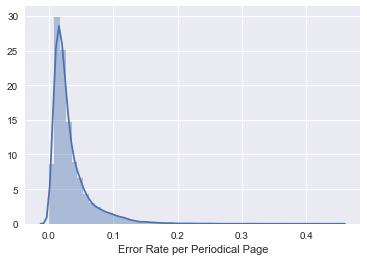

In [40]:
# %load shared_elements/summary.py
summary = GoH.reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [41]:
# %load shared_elements/top_errors.py
errors_summary = GoH.reports.get_errors_summary( summary )
GoH.reports.top_errors( errors_summary, 10 )[:50]

[('m', 65502),
 ('e', 59940),
 ('t', 52336),
 ("'", 49846),
 ('w', 47571),
 ('d', 47345),
 ('n', 41250),
 ('r', 33984),
 ('f', 26441),
 ('g', 23984),
 ('th', 20526),
 ('co', 19615),
 ('pp', 11482),
 ('wm', 9341),
 ('u', 7226),
 ('ex', 5839),
 ('sr', 5684),
 ('x', 5458),
 ('oz', 4478),
 ('k', 4236),
 ('tion', 3869),
 ('re', 3793),
 ('brn', 3750),
 ('pm', 3611),
 ('vt', 2867),
 ('pa', 2779),
 ('q', 2750),
 ("of'", 2628),
 ('al', 2455),
 ('ets', 2231),
 ('nd', 2148),
 ("''", 2106),
 ('mo', 2089),
 ('ti', 1994),
 ('il', 1949),
 ('z', 1930),
 ('mt', 1853),
 ("the'", 1782),
 ('ment', 1700),
 ('ft', 1618),
 ('se', 1541),
 ('aro', 1506),
 ('ni', 1490),
 ('es', 1468),
 ('wo', 1431),
 ('ve', 1357),
 ('eze', 1357),
 ('id', 1345),
 ('tt', 1335),
 ('ch', 1298)]